In [26]:
%matplotlib notebook
import common
import plot_demand_heatmap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

In [27]:
df = common.load_data(nrows=100000)

Executing: load_data
With Args: None
With Kwargs: 
	nrows : 100000
	load : True
Result: <class 'pandas.core.frame.DataFrame'>
Execution Duration: 2.54233193398 seconds



In [24]:
def plot_density(n_bins=200):
    # start_dt = datetime(2014, 1, 10, 4, 0)
    # end_dt = datetime(2014, 1, 10, 4, 10)
    # df = common.query_dates(df, start_dt, end_dt, "dropoff_datetime") 
    pus = common.get_pickup_geos(df)
    dos = common.get_dropoff_geos(df)
    pus_hm, xedges, yedges = np.histogram2d(pus[:, 0], pus[:, 1], bins=n_bins)
    dos_hm, xedges, yedges = np.histogram2d(dos[:, 0], dos[:, 1], bins=n_bins)
    plt.subplot(1, 2, 1)
    plt.title("Pickup density")
    plt.pcolor(pus_hm)
    plt.subplot(1, 2, 2)
    plt.title("Dropoff density")
    plt.pcolor(dos_hm)
    plt.show()

<IPython.core.display.Javascript object>


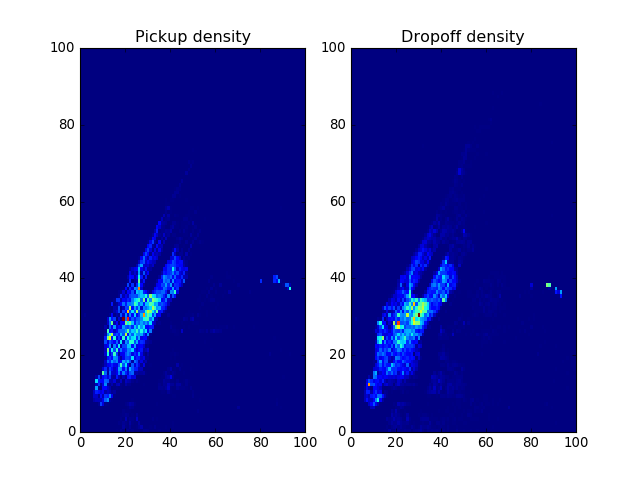

In [25]:
plot_density(100)